In [166]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [167]:
df = pd.read_csv("S:\\My_Programms\\Anaconda_lab\\Dataset\\movie\\movies.csv")
df.head(2)

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
0,Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)
1,Battalion 609,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,0,2019,131,War,4.1,73,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,NaN,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India)


In [168]:
df = df.drop(columns=(['poster_path','wiki_link','title_x','title_y','story','summary']))
df.head(2)

,imdb_id,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,tagline,actors,wins_nominations,release_date
0,tt8291224,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)
1,tt9472208,Battalion 609,0,2019,131,War,4.1,73,NaN,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India)


In [169]:
df.shape

(1629, 12)

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1629 entries, 0 to 1628
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   imdb_id           1629 non-null   object 
 1   original_title    1629 non-null   object 
 2   is_adult          1629 non-null   int64  
 3   year_of_release   1629 non-null   int64  
 4   runtime           1629 non-null   object 
 5   genres            1629 non-null   object 
 6   imdb_rating       1629 non-null   float64
 7   imdb_votes        1629 non-null   int64  
 8   tagline           557 non-null    object 
 9   actors            1624 non-null   object 
 10  wins_nominations  707 non-null    object 
 11  release_date      1522 non-null   object 
dtypes: float64(1), int64(3), object(8)
memory usage: 152.8+ KB


In [171]:
df.columns

Index(['imdb_id', 'original_title', 'is_adult', 'year_of_release', 'runtime',
       'genres', 'imdb_rating', 'imdb_votes', 'tagline', 'actors',
       'wins_nominations', 'release_date'],
      dtype='object')

In [172]:
df.isnull().sum()

imdb_id                0
original_title         0
is_adult               0
year_of_release        0
runtime                0
genres                 0
imdb_rating            0
imdb_votes             0
tagline             1072
actors                 5
wins_nominations     922
release_date         107
dtype: int64

### working with the each numerical  column

### runtime

In [173]:
df['runtime'] = df['runtime'].str.replace("\\N","NaN") ## filling the \N to non value 

In [174]:
df['runtime'] = df['runtime'].astype('float64') ## converting in to float

In [175]:
df['runtime'].isnull().sum() # checking the null value

119

In [176]:
df['runtime'].mean() # findinf the mean

132.8543046357616

In [177]:
df['runtime'].std()

24.995373289828258

In [178]:
df['runtime'] = df['runtime'].fillna(df['runtime'].mean()) # filling the missing values using the mean of the column

In [179]:
df['runtime'] = df['runtime'].astype('int64') # converting into integer

### imdb_rating	

In [180]:
df['imdb_rating']

0       8.4
1       4.1
2       6.1
3       6.0
4       7.3
       ... 
1624    4.9
1625    3.0
1626    6.1
1627    7.4
1628    9.0
Name: imdb_rating, Length: 1629, dtype: float64

In [181]:
df['imdb_rating'].isnull().sum()

0

In [182]:
df['imdb_rating'].value_counts()

imdb_rating
5.7    54
6.2    45
5.3    45
7.2    45
6.8    43
       ..
8.9     1
1.8     1
8.6     1
9.4     1
9.0     1
Name: count, Length: 76, dtype: int64

In [183]:
df[df['imdb_rating'] == 0] # 9 movie has 0 imdb_rating

,imdb_id,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,tagline,actors,wins_nominations,release_date
70,tt8876008,Keep Safe Distance,0,2019,128,Action|Thriller,0.0,0,NaN,Shahbaaz Khan|Adi Irani|Vikas Anand|Kiran Kuma...,NaN,NaN
186,tt6752836,Ek Rani Aisi Bhi Thi,0,2013,132,Biography|History,0.0,0,NaN,Hema Malini|Vinod Khanna|Sachin Khedekar|Rajes...,NaN,NaN
206,tt9574388,Bachche Kachche Sachche,0,2017,132,Drama|Short,0.0,0,NaN,Manoj Babani|Mukesh Tiwari|,NaN,NaN
236,tt7881528,Babuji Ek Ticket Bambai,0,2017,132,Comedy|Drama,0.0,0,NaN,Sudha Chandran|Yashpal Sharma|,NaN,NaN
298,tt6656806,khel toh ab shuru hoga,0,2016,130,Action|Thriller,0.0,0,NaN,Hazel Croney|Devshi Khanduri|Ruslaan Mumtaz|,NaN,13 May 2016 (India)
331,tt7997334,Ek Kahani Julie Ki,0,2016,119,Drama,0.0,0,NaN,Jimmy Sharma|,NaN,NaN
407,tt4718678,I Love Desi,0,2015,132,Comedy|Romance,0.0,0,NaN,Shakti Anand|Arun Bali|Vedant Bali|Sunita Dhir...,NaN,NaN
472,tt10635372,Dee Saturday Night,0,2014,132,Drama,0.0,0,NaN,NaN,NaN,NaN
479,tt3482198,Anuradha,0,2014,132,Drama,0.0,0,NaN,Sachin Khedekar|Hrishitaa Bhatt|Manoj Joshi|Ki...,NaN,NaN


### is_adult

In [184]:
df['is_adult'].isnull().sum() # no missing values

0

### imdb_votes

In [185]:
df['imdb_votes'].isnull().sum() # no missing values

0

In [186]:
df['imdb_votes'].value_counts(ascending=True)

imdb_votes
35112    1
7266     1
16941    1
10796    1
6357     1
        ..
47       6
13       6
43       6
40       7
0        9
Name: count, Length: 1267, dtype: int64

<Axes: xlabel='imdb_votes'>

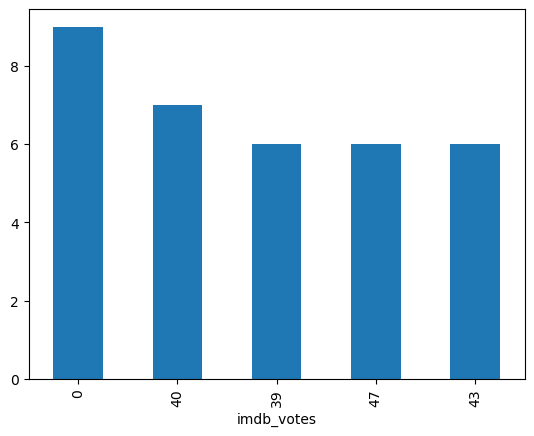

In [187]:
df['imdb_votes'].value_counts().head().plot(kind='bar')

<Axes: xlabel='imdb_votes'>

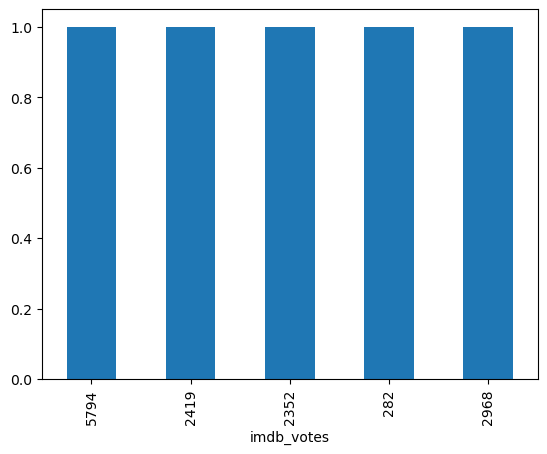

In [188]:
df['imdb_votes'].value_counts().tail().plot(kind='bar')


## working with the categorical data

#### geners

In [189]:
df['genres'].value_counts()

genres
Drama                     162
Comedy|Drama|Romance      101
Comedy|Drama               88
Drama|Romance              86
Action|Crime|Drama         86
                         ... 
Action|Horror|Sci-Fi        1
Crime                       1
Crime|Musical|Thriller      1
Adventure|Drama|Family      1
Comedy|Musical|Mystery      1
Name: count, Length: 205, dtype: int64

In [190]:
df['genres'].str.split('|').apply(lambda x: x[0]) # taking the first value of the generes

0          Action
1             War
2       Biography
3           Crime
4           Drama
          ...    
1624        Drama
1625        Drama
1626       Comedy
1627       Action
1628        Drama
Name: genres, Length: 1629, dtype: object

In [191]:
df['genres'].str.split('|').apply(lambda x: x[0])

0          Action
1             War
2       Biography
3           Crime
4           Drama
          ...    
1624        Drama
1625        Drama
1626       Comedy
1627       Action
1628        Drama
Name: genres, Length: 1629, dtype: object

In [192]:
df.head(2)

,imdb_id,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,tagline,actors,wins_nominations,release_date
0,tt8291224,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)
1,tt9472208,Battalion 609,0,2019,131,War,4.1,73,NaN,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India)


<Axes: xlabel='genres'>

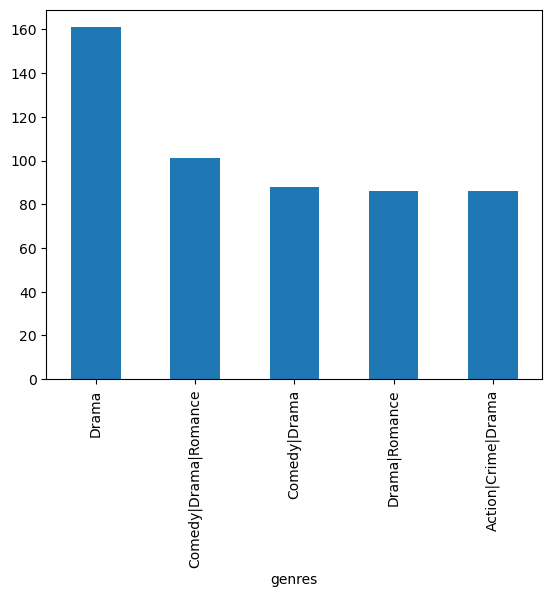

In [200]:
df['genres'].value_counts().head().plot(kind='bar')

### actors

In [194]:
df['actors'].sample().iloc[0]

'Nargis Fakhri|Rajkummar Rao|Bo Derek|Candy Clark|Anneliese van der Pol|Suvinder Vicky|Mariana Paola Vicente|Saru Maini|Robert Palmer Watkins|Dawn Richard|'

In [195]:
df[df['actors'].isnull()]

,imdb_id,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,tagline,actors,wins_nominations,release_date
472,tt10635372,Dee Saturday Night,0,2014,132,Drama,0.0,0,NaN,NaN,NaN,NaN
963,tt8823390,Bal Ganesh 2,0,2009,74,Animation,7.4,10,NaN,NaN,NaN,2009 (India)
1435,tt0402178,Final Solution,0,2004,218,Documentary,8.7,333,NaN,NaN,5 wins & 2 nominations,13 February 2004 (Germany)
1449,tt0392033,Ganges: River to Heaven,0,2003,79,Documentary,7.4,17,NaN,NaN,NaN,21 November 2003 (Netherlands)
1540,tt0311356,Jang Aur Aman,0,2002,148,Documentary|War,8.3,113,NaN,NaN,3 wins,25 June 2003 (USA)


In [196]:
df.drop([472,963,1435,1449,1540],inplace=True) # dropping the null actors rows

In [197]:
df['actors']

0       Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...
1       Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...
2       Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...
3       Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...
4       Mona Ambegaonkar|Ananth Narayan Mahadevan|Deva...
                              ...                        
1624    Ajay Devgn|Sonali Bendre|Namrata Shirodkar|Pre...
1625    Ameesha Patel|Jimmy Sheirgill|Nafisa Ali|Gulsh...
1626    Vijay Arora|Asrani|Rajni Bala|Kumud Damle|Utpa...
1627                            Gippy Grewal|Zareen Khan|
1628                                          Fawad Khan|
Name: actors, Length: 1624, dtype: object

In [198]:
df['actors'].str.split('|').apply(lambda x:x[0:3])

0              [Vicky Kaushal, Paresh Rawal, Mohit Raina]
1           [Vicky Ahuja, Shoaib Ibrahim, Shrikant Kamat]
2             [Anupam Kher, Akshaye Khanna, Aahana Kumra]
3       [Emraan Hashmi, Shreya Dhanwanthary, Snighdade...
4       [Mona Ambegaonkar, Ananth Narayan Mahadevan, D...
                              ...                        
1624       [Ajay Devgn, Sonali Bendre, Namrata Shirodkar]
1625         [Ameesha Patel, Jimmy Sheirgill, Nafisa Ali]
1626                    [Vijay Arora, Asrani, Rajni Bala]
1627                        [Gippy Grewal, Zareen Khan, ]
1628                                       [Fawad Khan, ]
Name: actors, Length: 1624, dtype: object

In [199]:
df.head()

,imdb_id,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,tagline,actors,wins_nominations,release_date
0,tt8291224,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)
1,tt9472208,Battalion 609,0,2019,131,War,4.1,73,NaN,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India)
2,tt6986710,The Accidental Prime Minister,0,2019,112,Biography|Drama,6.1,5549,NaN,Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...,NaN,11 January 2019 (USA)
3,tt8108208,Why Cheat India,0,2019,121,Crime|Drama,6.0,1891,NaN,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...,NaN,18 January 2019 (USA)
4,tt6028796,Evening Shadows,0,2018,102,Drama,7.3,280,NaN,Mona Ambegaonkar|Ananth Narayan Mahadevan|Deva...,17 wins & 1 nomination,11 January 2019 (India)
